In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from tqdm import tqdm
sys.path.append('../Deep Learning/')
from nn_optimization_methods import SGD
from layers.Dense import Dense
from layers.Input import Input
sys.path.append('../tools/')
import tools

%matplotlib inline

## DNN from scratch

approximate sin function from random values.

In [16]:
x = np.linspace(-10, 10, 1000)

In [17]:
y = np.sin(x)**2

In [20]:
df = pd.DataFrame({'x':x,'y':y})

In [21]:
class DNN():
    
    """
    Deep Neural Network Template for regression and classification tasks
    Parameters:
        X: numpy array() data matrix
        y: numpy array() response variables, must be numeric
        output: numpy array() outputs
        outlayer = output layer
        head = input layer
    
    Use like sequential model from Keras:
        Ex: add a dense layer with 200 neurons and a sigmoid activation function:
                dnn.add("dense","sigmoid",20)
    """
    def __init__(self,X,y):
            
        self.X = X
        self.y = y
        self.output = 0
        self.outlayer = Input(self.X)
        self.head = self.outlayer
    
    def add(self,layertype,activation,neurons):
        
        if layertype == "dense":
                layer = Dense(self.outlayer,neurons,activation)
                self.outlayer.setNext(layer)
                self.outlayer = layer
            
    def foward(self,inputs=None):
        
        if np.all(inputs != None):
            
            self.head.update(inputs)
            
        layer = self.head
        
        while np.all(layer.next != None):
            
            layer.foward()
            layer = layer.getNext()
        
        layer.foward()
        return layer.output
        
    def backward_pass(self,predictions,y,loss="MSE"):
        
        cache = 0
        gradients = []
        
        if loss == "MSE":
            
            layer = self.outlayer
            cache = np.array(np.sum(predictions - y))
            derivative = layer.getPrev().dot(cache*(layer.deriv),True)
            gradients.append(derivative)
            layer = layer.getPrev()
            
            while np.all(layer.getPrev() != None):
                cache = (cache.dot(layer.getNext().getWeights().T))*layer.deriv
                gradients.append(layer.getPrev().dot(cache,True))
                layer = layer.getPrev()
            
            return gradients[::-1]
        
    def train(self,X,y,optimizer=SGD,lr=0.0001,epochs=100,batch_size=1):
        
        optimizer(self,X,y,learning_rate=lr,epochs=epochs,batch_size=batch_size)
        
    def predict(self,X):
        
        return self.foward(X)
        
    def __str__(self):
        
        string = "----------------------------- Model -----------------------------" + '\n'
        layer = self.head
        
        while np.all(layer != None):
            string += layer.__str__()
            layer = layer.getNext()
            
        return string
    

In [29]:
x = x.reshape(x.shape[0],1)
dnn = DNN(x,y)
dnn.add("dense","sigmoid",24)
dnn.add("dense","sigmoid",48)
dnn.add("dense","sigmoid",16)
dnn.add("dense","linear",1)
print(dnn)

----------------------------- Model -----------------------------
Input: shape: (None, 1)
-----------------------------------------------------------------
Dense: activation: sigmoid, weight shape: (1, 24), output shape: (None, 24), parameters: 24
-----------------------------------------------------------------
Dense: activation: sigmoid, weight shape: (24, 48), output shape: (None, 48), parameters: 1152
-----------------------------------------------------------------
Dense: activation: sigmoid, weight shape: (48, 16), output shape: (None, 16), parameters: 768
-----------------------------------------------------------------
Dense: activation: linear, weight shape: (16, 1), output shape: (None, 1), parameters: 16
-----------------------------------------------------------------



In [31]:
dnn.train(x,y,lr=0.001,epochs=1000)





  0%|          | 0/1000 [00:00<?, ?it/s]



MSE 0.12752541773240345:   0%|          | 0/1000 [00:00<?, ?it/s]



MSE 0.12752541773240345:   0%|          | 1/1000 [00:00<13:46,  1.21it/s]



MSE 0.12758096672268038:   0%|          | 1/1000 [00:01<25:32,  1.53s/it]



MSE 0.12758096672268038:   0%|          | 2/1000 [00:01<12:49,  1.30it/s]



MSE 0.12764364226517627:   0%|          | 2/1000 [00:02<18:45,  1.13s/it]



MSE 0.12764364226517627:   0%|          | 3/1000 [00:02<12:32,  1.33it/s]

KeyboardInterrupt: 

In [9]:
predictions = dnn.predict(x)

In [10]:
predictions = predictions.reshape(predictions.shape[0],)

In [11]:
newd = pd.DataFrame({'x':df["x"],'y':predictions})

In [12]:
df["y"][:20]

0     0.708073
1     0.706251
2     0.704426
3     0.702597
4     0.700765
5     0.698930
6     0.697092
7     0.695250
8     0.693406
9     0.691558
10    0.689707
11    0.687854
12    0.685997
13    0.684137
14    0.682274
15    0.680408
16    0.678540
17    0.676668
18    0.674794
19    0.672917
Name: y, dtype: float64

In [13]:
newd["y"][:20]

0     0.695643
1     0.693991
2     0.692337
3     0.690680
4     0.689019
5     0.687355
6     0.685688
7     0.684019
8     0.682346
9     0.680670
10    0.678991
11    0.677308
12    0.675623
13    0.673935
14    0.672244
15    0.670550
16    0.668853
17    0.667152
18    0.665449
19    0.663743
Name: y, dtype: float64

Predicted after 10000 epochs

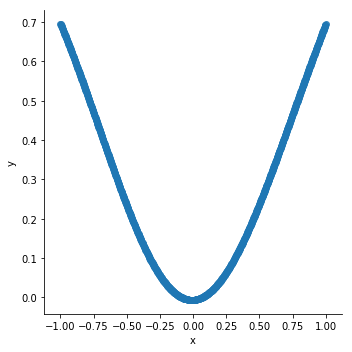

In [14]:
sns.lmplot(x='x', y='y',data=newd,
           fit_reg=False, # No regression line
          )  

Original sin wave

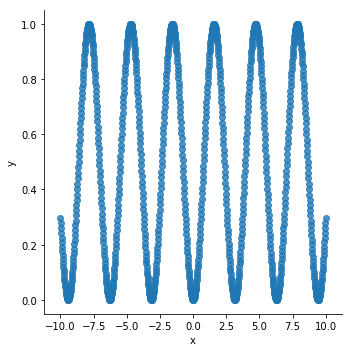

In [19]:
sns.lmplot(x='x', y='y',data=df,
           fit_reg=False, # No regression line
          )   